In [1]:
import geopandas as gpd

In [2]:
floating = gpd.read_file("PJT001_h_100m_cell_flow.geojson")

In [3]:
floating.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 136571 entries, 0 to 136570
Data columns (total 28 columns):
id          136571 non-null int64
ymd         136571 non-null object
t00_01      107200 non-null float64
t01_02      100715 non-null float64
t02_03      97007 non-null float64
t03_04      94396 non-null float64
t04_05      100317 non-null float64
t05_06      110780 non-null float64
t06_07      123065 non-null float64
t07_08      128938 non-null float64
t08_09      130383 non-null float64
t09_10      132145 non-null float64
t10_11      133629 non-null float64
t11_12      133974 non-null float64
t12_13      134228 non-null float64
t13_14      133676 non-null float64
t14_15      133441 non-null float64
t15_16      133392 non-null float64
t16_17      132884 non-null float64
t17_18      131772 non-null float64
t18_19      129736 non-null float64
t19_20      127078 non-null float64
t20_21      124967 non-null float64
t21_22      122035 non-null float64
t22_23      118097 non

In [4]:
floating.head()

,id,ymd,t00_01,t01_02,t02_03,t03_04,t04_05,t05_06,t06_07,t07_08,...,t16_17,t17_18,t18_19,t19_20,t20_21,t21_22,t22_23,t23_24,emd_cd,geometry
0,3573,20180701,0.07,0.35,0.07,NaN,NaN,0.14,0.07,0.42,...,0.42,0.21,0.21,0.14,0.14,0.28,0.14,0.21,41590370,"POLYGON ((126.86813 37.09967, 126.86925 37.099..."
1,3574,20180701,0.01,NaN,NaN,NaN,0.01,0.01,0.01,0.03,...,0.03,0.04,0.03,0.02,0.02,0.01,0.02,0.01,41590370,"POLYGON ((126.87150 37.09877, 126.87263 37.098..."
2,3575,20180701,0.01,NaN,NaN,NaN,0.01,0.01,0.01,0.03,...,0.03,0.04,0.03,0.02,0.02,0.01,0.02,0.01,41590370,"POLYGON ((126.87150 37.09968, 126.87263 37.099..."
3,3576,20180701,0.01,0.02,0.01,NaN,NaN,0.03,0.09,0.17,...,0.16,0.14,0.14,0.07,0.06,0.05,0.01,0.02,41590370,"POLYGON ((126.86925 37.10057, 126.87037 37.100..."
4,3577,20180701,NaN,NaN,0.01,NaN,NaN,NaN,0.01,0.01,...,0.01,0.02,0.02,0.01,0.01,NaN,NaN,NaN,41590370,"POLYGON ((126.87150 37.10148, 126.87262 37.101..."


In [5]:
sliced = floating[['id', 'ymd', 't07_08', 'emd_cd', 'geometry']]

In [7]:
sliced.to_file("sample floatings.shp")

In [9]:
sliced['t07_08'].sort_values(ascending=False)

78999     1202.06
84152      740.50
110259     727.62
74195      587.68
80766      572.92
           ...   
136387        NaN
136389        NaN
136434        NaN
136480        NaN
136509        NaN
Name: t07_08, Length: 136571, dtype: float64

In [1]:
import pandas as pd

In [2]:
move = pd.read_csv("PJT001_sk_emd_od.csv")

In [13]:
move.head()

,std_ymd,tm_trm,org,dst,pop
0,20180703,00_05,기배동,남양읍,11.04
1,20180703,00_05,기배동,동탄1동,13.80
2,20180703,00_05,기배동,동탄2동,24.84
3,20180703,00_05,기배동,동탄3동,8.28
4,20180703,00_05,기배동,동탄4동,2.76


In [14]:
sliced=  move[move['std_ymd']==20180701]

In [15]:
sliced.head()

,std_ymd,tm_trm,org,dst,pop
6789,20180701,00_05,기배동,남양읍,5.52
6790,20180701,00_05,기배동,동탄1동,5.52
6791,20180701,00_05,기배동,동탄2동,19.32
6792,20180701,00_05,기배동,동탄3동,2.76
6793,20180701,00_05,기배동,동탄5동,5.52


In [17]:
simplified = sliced.groupby(['org', 'dst']).sum()

simplified['origin'] = simplified.index.get_level_values(0)

simplified['dest'] = simplified.index.get_level_values(1)

simplified

In [23]:
pos = pd.read_csv("gis/화성시 행정동 위치.csv", index_col=0)

In [24]:
pos

,동명,x,y,주소
0,기배동,126.984680,37.224399,경기 화성시 기배동
1,남양읍,126.823776,37.211787,경기 화성시 남양읍
2,동탄1동,127.071916,37.206523,경기 화성시 동탄1동
3,동탄2동,127.072393,37.196856,경기 화성시 동탄2동
4,동탄3동,127.058896,37.209875,경기 화성시 동탄3동
5,동탄4동,127.112307,37.199730,경기 화성시 동탄4동
6,동탄5동,127.103990,37.210157,경기 화성시 동탄5동
7,동탄6동,127.089612,37.173424,경기 화성시 동탄6동
8,마도면,126.769634,37.205474,경기 화성시 마도면
9,매송면,126.909117,37.252341,경기 화성시 매송면


In [28]:
simplified.to_excel("행정동별 이동.xlsx")

In [29]:
sliced

,std_ymd,tm_trm,org,dst,pop
6789,20180701,00_05,기배동,남양읍,5.52
6790,20180701,00_05,기배동,동탄1동,5.52
6791,20180701,00_05,기배동,동탄2동,19.32
6792,20180701,00_05,기배동,동탄3동,2.76
6793,20180701,00_05,기배동,동탄5동,5.52
...,...,...,...,...,...
9061,20180701,18_23,화산동,장안면,16.56
9062,20180701,18_23,화산동,정남면,408.36
9063,20180701,18_23,화산동,진안동,1271.95
9064,20180701,18_23,화산동,팔탄면,44.16


In [30]:
from shapely.geometry import LineString

In [31]:
simplified

std_ymd      pop origin  dest
org dst                                 
기배동 남양읍   80722804   184.92    기배동   남양읍
    동탄1동  80722804   110.40    기배동  동탄1동
    동탄2동  80722804   237.35    기배동  동탄2동
    동탄3동  80722804    69.00    기배동  동탄3동
    동탄4동  60542103    13.80    기배동  동탄4동
...            ...      ...    ...   ...
화산동 장안면   80722804   126.96    화산동   장안면
    정남면   80722804  1804.56    화산동   정남면
    진안동   80722804  4293.16    화산동   진안동
    팔탄면   80722804   367.03    화산동   팔탄면
    향남읍   80722804   596.06    화산동   향남읍

[598 rows x 4 columns]

In [32]:
coord1 = "126.9846805	37.22439891	126.8237759	37.21178748"

In [33]:
coord2 = "126.8237759	37.21178748	126.9846805	37.22439891"

In [34]:
coord1 = coord1.split()

In [35]:
coord2 = coord2.split()

In [36]:
coord1

['126.9846805', '37.22439891', '126.8237759', '37.21178748']

In [38]:
coord1 = [float(x) for x in coord1]

In [40]:
coord2 = [float(x) for x in coord2]

In [41]:
line1 = LineString([(coord1[0], coord1[1]), (coord1[2], coord1[3])])
line2 = LineString([(coord2[0], coord2[1]), (coord2[2], coord2[3])])

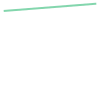

In [42]:
line1

In [43]:
line1.length

0.16139807454800467

In [44]:
line1.bounds

(126.8237759, 37.21178748, 126.9846805, 37.22439891)

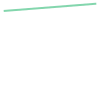

In [45]:
line2

In [46]:
line2.length

0.16139807454800467

In [47]:
line2.bounds

(126.8237759, 37.21178748, 126.9846805, 37.22439891)

In [49]:
list(line2.coords)

[(126.8237759, 37.21178748), (126.9846805, 37.22439891)]

In [50]:
list(line1.coords)

[(126.9846805, 37.22439891), (126.8237759, 37.21178748)]

In [55]:
withCoords = pd.read_table("gis/행정동별 이동.txt")

In [56]:
withCoords

,pop,origin,dest,x1,y1,x2,y2
0,184.92,기배동,남양읍,126.984680,37.224399,126.823776,37.211787
1,110.40,기배동,동탄1동,126.984680,37.224399,127.071916,37.206523
2,237.35,기배동,동탄2동,126.984680,37.224399,127.072393,37.196856
3,69.00,기배동,동탄3동,126.984680,37.224399,127.058896,37.209875
4,13.80,기배동,동탄4동,126.984680,37.224399,127.112307,37.199730
...,...,...,...,...,...,...,...
593,126.96,화산동,장안면,127.014816,37.206176,126.831329,37.079764
594,1804.56,화산동,정남면,127.014816,37.206176,126.971337,37.159986
595,4293.16,화산동,진안동,127.014816,37.206176,127.034961,37.213323
596,367.03,화산동,팔탄면,127.014816,37.206176,126.904853,37.162265


In [57]:
starts = withCoords[['x1', 'y1']].values
ends = withCoords[['x2', 'y2']].values

In [68]:
new = []

In [61]:
new

,breadth,geometry


In [69]:
for index, num in enumerate(withCoords['pop']) : 
    new.append([num, LineString([starts[index], ends[index]])])

In [70]:
new

[[184.92, <shapely.geometry.linestring.LineString at 0x1e305972888>],
 [110.4, <shapely.geometry.linestring.LineString at 0x1e305972c08>],
 [237.35, <shapely.geometry.linestring.LineString at 0x1e305972b08>],
 [69.0, <shapely.geometry.linestring.LineString at 0x1e305972dc8>],
 [13.8, <shapely.geometry.linestring.LineString at 0x1e30596c748>],
 [55.2, <shapely.geometry.linestring.LineString at 0x1e30596ca48>],
 [135.24, <shapely.geometry.linestring.LineString at 0x1e30596ccc8>],
 [38.64, <shapely.geometry.linestring.LineString at 0x1e30596c508>],
 [184.9, <shapely.geometry.linestring.LineString at 0x1e30596cf48>],
 [104.88, <shapely.geometry.linestring.LineString at 0x1e30596c888>],
 [193.2, <shapely.geometry.linestring.LineString at 0x1e305a91088>],
 [173.88, <shapely.geometry.linestring.LineString at 0x1e305a91308>],
 [10501.08, <shapely.geometry.linestring.LineString at 0x1e305a91d88>],
 [102.12, <shapely.geometry.linestring.LineString at 0x1e305a911c8>],
 [146.28, <shapely.geometry.

In [71]:
import geopandas as gpd

In [73]:
frame = gpd.GeoDataFrame(new)

In [74]:
frame.columns = ['breadth', 'geometry']

In [76]:
frame.to_file("gis/lineTest.shp")